In [1]:
root_path = 'miniconda3'
import sys
sys.path.append(f'{root_path}envs/mp/lib/python3.12.4/site-packages/')

import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Math, HTML

If the bash !mpirun fails running for some reason, try avoid running the cell below, although it will still be considered in the .py file

In [3]:
from mpi4py.MPI import COMM_WORLD

comm = COMM_WORLD
rank = comm.Get_rank()

The cell below is for single core meep simulation

In [17]:
# Rankfreq = [0.65146580,0.6493506,0.64724919,0.64516129,0.6430861,0.6410256]
FreqArray = [1/3,1/2.9,1/2.8,1/2.7,1/2.6,1/2.5,1/2.4,1/2.3,1/2.2,1/2.1,1/2,1/1.9,1/1.8,1/1.7,1/1.6,1/1.5,1/1.4,1/1.3,1/1.2,1/1.1,1/1,1/0.9,1/0.8,1/0.7,1/0.6,1/0.5,1/0.4]
print(len(FreqArray))

27


In [3]:
cell = mp.Vector3(40,16,0)  # This is the simulation window. Here is defined a 2D-cell

pml_layers = [mp.PML(2.0)]  # Adding an absorbing layer (PML) of thickness 0.1 μm around all sides of the cell

geometry = [mp.Block(mp.Vector3(mp.inf,0.5,0.22), 
                     center=mp.Vector3(),             # Centered at (0,0)
                     material=mp.Medium(epsilon=12))] # Material with ε=12    # Defines a parallelepiped block 

resolution = 30

In [5]:
print(f'Kc={np.sqrt((1*np.pi/0.5)**2 + (0*np.pi/0.22)**2)}')
print(f'LambdaC = {3.17*2*np.pi/6.283185307179586}')

Kc=6.283185307179586
LambdaC = 3.1700000000000004


In [6]:
sources = [mp.Source(mp.ContinuousSource(frequency=FreqArray[0]),  
                    component=mp.Ez,                     # Component Ez to specify a eletric current
                    center=mp.Vector3(-7,0))]     

# Is important to leave a little space between sources and the cell boundaries, 
# to keep the boundary conditions from interfering with them.

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [10]:
sim.run(until=200)  # Run until a time of t = 100

-----------
Initializing structure...
time for choose_chunkdivision = 0.000167131 s
Working in 2D dimensions.
Computational cell is 40 x 16 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,0.5,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.036751 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


In [25]:
for i in FreqArray:

    print(f'Wavelength: {1/i} μm')
    sources = [mp.Source(mp.ContinuousSource(frequency=i),  
                        component=mp.Ez,                     # Component Ez to specify a eletric current
                        center=mp.Vector3(-16,0))]     

    # Is important to leave a little space between sources and the cell boundaries, 
    # to keep the boundary conditions from interfering with them.

    sim = mp.Simulation(cell_size=cell,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=sources,
                        resolution=resolution)
    
    pt = mp.Vector3(0,0)

    sim.run(until=200)  # Run until a time of t = 200
    #sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-1))

Wavelength: 3.0 μm
-----------
Initializing structure...
time for choose_chunkdivision = 0.000809908 s
Working in 2D dimensions.
Computational cell is 40 x 16 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,0.5,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 1.80532 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 3.13/200.0 = 1.6% done in 4.0s, 251.9s to go
on time step 314 (time=3.14), 0.0127804 s/step
Meep progress: 6.44/200.0 = 3.2% done in 8.0s, 240.6s to go
on time step 646 (time=6.46), 0.0120732 s/step
Meep progress: 9.74/200.0 = 4.9% done in 12.0s, 234.6s to go
on time step 976 (time=9.76), 0.0121295 s/step
Meep progress: 13.08/200.0 = 6.5% done in 16.0s, 228.9s to go
on time step 1310 (time=13.1), 0.0120013 s/step
Meep progress: 16.48/200.0 = 8.2% done in 20.0s, 223.0s to go
on time step 1650 (time=16.5), 0.0117754 s/step
Meep progress: 19.91/200.0 = 10.0% done in 24.0s, 217.3s to go
on time step 1993 (time=19.93), 0.0116771 s/step
Meep progress: 23.35/200.0 = 11.7% done in 28.0s, 212.1s to go
on time step 2337 (time=23.37), 0.0116457 s/step
Meep progress: 26.79/200.0 = 13.4% done in 32.0s, 207.2s to go
on time step 2681 (time=26.81), 0.0116597 s/step
Meep progress: 30.23/200.0 = 15.1% done in 36.0s, 202.4s to go
on time step 3026 (time=30.26), 0.0116215 s/step
Meep progr

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 3.13/200.0 = 1.6% done in 4.0s, 251.7s to go
on time step 314 (time=3.14), 0.012774 s/step
Meep progress: 6.44/200.0 = 3.2% done in 8.0s, 240.8s to go
on time step 645 (time=6.45), 0.0121094 s/step
Meep progress: 9.76/200.0 = 4.9% done in 12.0s, 234.2s to go
on time step 977 (time=9.77), 0.0120511 s/step
Meep progress: 13.1/200.0 = 6.5% done in 16.0s, 228.5s to go
on time step 1311 (time=13.11), 0.0119883 s/step
Meep progress: 16.45/200.0 = 8.2% done in 20.0s, 223.5s to go
on time step 1646 (time=16.46), 0.0119697 s/step
Meep progress: 19.76/200.0 = 9.9% done in 24.0s, 219.3s to go
on time step 1977 (time=19.77), 0.0121113 s/step
Meep progress: 23.06/200.0 = 11.5% done in 28.0s, 215.2s to go
on time step 2307 (time=23.07), 0.012138 s/step
Meep progress: 26.32/200.0 = 13.2% done in 32.1s, 211.5s to go
on time step 2633 (time=26.33), 0.0122923 s/step
Meep progress: 29.62/200.0 = 14.8% done in 36.1s, 207.4s to go
on time step 2963 (time=29.63), 0.0121231 s/step
Meep progres

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 4.26/200.0 = 2.1% done in 4.0s, 184.0s to go
on time step 426 (time=4.26), 0.00939613 s/step
Meep progress: 8.64/200.0 = 4.3% done in 8.0s, 177.4s to go
on time step 864 (time=8.64), 0.00914098 s/step
Meep progress: 13.05/200.0 = 6.5% done in 12.0s, 172.1s to go
on time step 1305 (time=13.05), 0.00907514 s/step
Meep progress: 17.47/200.0 = 8.7% done in 16.0s, 167.3s to go
on time step 1747 (time=17.47), 0.00905739 s/step
Meep progress: 21.89/200.0 = 10.9% done in 20.0s, 162.9s to go
on time step 2189 (time=21.89), 0.00905264 s/step
Meep progress: 26.310000000000002/200.0 = 13.2% done in 24.0s, 158.6s to go
on time step 2631 (time=26.31), 0.0090524 s/step
Meep progress: 30.7/200.0 = 15.3% done in 28.0s, 154.5s to go
on time step 3070 (time=30.7), 0.00911788 s/step
Meep progress: 35.11/200.0 = 17.6% done in 32.0s, 150.4s to go
on time step 3511 (time=35.11), 0.00907592 s/step
Meep progress: 39.53/200.0 = 19.8% done in 36.0s, 146.2s to go
on time step 3954 (time=39.54), 0.0

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 3.71/200.0 = 1.9% done in 4.0s, 212.2s to go
on time step 371 (time=3.71), 0.0108002 s/step
Meep progress: 7.59/200.0 = 3.8% done in 8.0s, 203.2s to go
on time step 759 (time=7.59), 0.0103212 s/step
Meep progress: 11.46/200.0 = 5.7% done in 12.0s, 197.8s to go
on time step 1146 (time=11.46), 0.010362 s/step
Meep progress: 15.36/200.0 = 7.7% done in 16.0s, 192.7s to go
on time step 1536 (time=15.36), 0.0102707 s/step
Meep progress: 19.330000000000002/200.0 = 9.7% done in 20.0s, 187.2s to go
on time step 1933 (time=19.33), 0.0100759 s/step
Meep progress: 23.29/200.0 = 11.6% done in 24.0s, 182.4s to go
on time step 2329 (time=23.29), 0.0101126 s/step
Meep progress: 27.240000000000002/200.0 = 13.6% done in 28.0s, 177.9s to go
on time step 2724 (time=27.24), 0.0101423 s/step
Meep progress: 31.21/200.0 = 15.6% done in 32.0s, 173.3s to go
on time step 3121 (time=31.21), 0.0100768 s/step
Meep progress: 35.09/200.0 = 17.5% done in 36.1s, 169.4s to go
on time step 3509 (time=35.09

## Parallel Simulation

In [1]:
cores = 2
resultPath = 'ParallelResults/Result.out'

In [2]:
!jupytext --to py MEEPParalleltesting.ipynb
!mpirun -np $cores python MEEPParalleltesting.py > $resultPath

[jupytext] Reading MEEPParalleltesting.ipynb in format ipynb
[jupytext] Updating the timestamp of MEEPParalleltesting.py


## Analyze

Getting the dieletric region

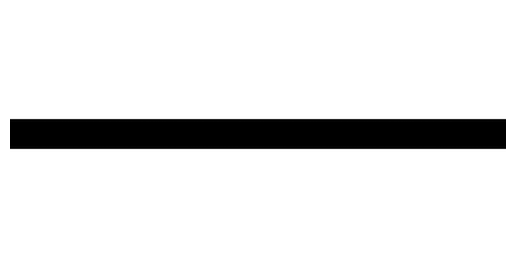

In [40]:
eps_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(8,4,0), component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

In [31]:
sim.get_array(center=mp.Vector3(), size=mp.Vector3(10,16,0), component=mp.Ez)

array([[-1.63123747e-05, -4.89702964e-05, -8.20189434e-05, ...,
        -8.20189434e-05, -4.89702964e-05, -1.63123747e-05],
       [-1.64936801e-05, -4.95188337e-05, -8.29494360e-05, ...,
        -8.29494360e-05, -4.95188337e-05, -1.64936801e-05],
       [-1.66497241e-05, -4.99912757e-05, -8.37519252e-05, ...,
        -8.37519252e-05, -4.99912757e-05, -1.66497241e-05],
       ...,
       [ 1.40738856e-05,  4.19837832e-05,  6.95437173e-05, ...,
         6.95437173e-05,  4.19837832e-05,  1.40738856e-05],
       [ 1.53117812e-05,  4.56807731e-05,  7.56825451e-05, ...,
         7.56825451e-05,  4.56807731e-05,  1.53117812e-05],
       [ 1.66175390e-05,  4.95616993e-05,  8.20642990e-05, ...,
         8.20642990e-05,  4.95616993e-05,  1.66175390e-05]])

Getting results

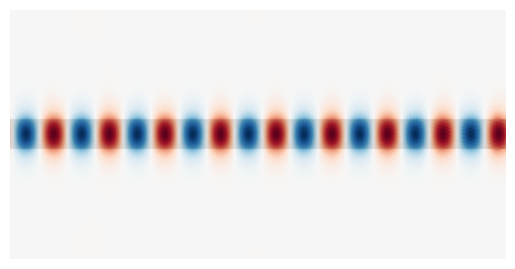

In [41]:
ez_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(8,4,0), component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
# plt.plot((16/2-7)*resolution,8/2*resolution,'go')
# plt.text((16/2-7)*resolution,(8/2 + 1)*resolution,'Source',color='g')
# plt.plot(80,39,'ro')
# plt.text(4,55,'Field Decay',color='g')
plt.show()